In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install cvlib
!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 66.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for cvlib: filename=cvlib-0.2.7-py3-none-any.whl size=10046368 sha256=177b2e3a9efaeb1d8c4376e5a5486d11c11d1ccf5e2f7e3addf0d2d2424cecb1
  Stored in directory: /root/.cache/pip/wheels/9e/a5/d4/fe37b48fe4f4b621ba5e574a991230070f3cc4f02322a01489
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12067 sha256=b0f6f719c941815720ccf11e031050a570eca315e41187e9007861e3d5d644fa
  Stored in directory: /root/.cache/pip/wheels/cd/17/e5/765d1a3112ff3978f70223502f6047e06c43a24d7c5f8ff95b
Successfully built cvlib progressbar
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 79.0 MB/s eta 0:00:00


['car', 'potted plant']
Number of cars in the image is 1
Total cars:-1


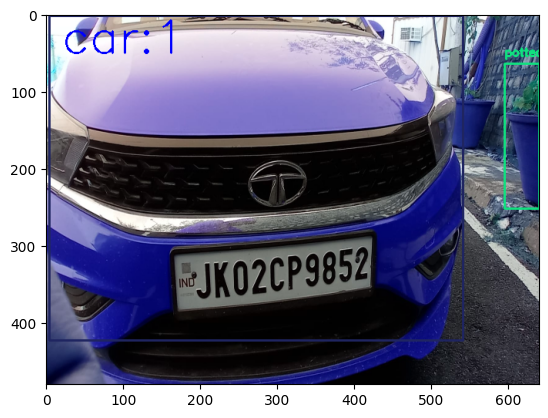

In [ ]:
import cv2
import glob
import easyocr
import cvlib as cv
import numpy as np
from time import sleep
import matplotlib.pyplot as plt
from cvlib.object_detection import draw_bbox


font = cv2.FONT_HERSHEY_PLAIN

counter = 0
def count(a):
    global counter
    counter +=a
    print ("Total cars:-"+str(counter))


def object(i):  
    # default model is YOLOv3 
    bbox, label, conf = cv.detect_common_objects(i)
    print (label)
    print('Number of cars in the image is '+ str(label.count('car')))
    b=label.count('car')
    output_image = draw_bbox(i, bbox, label, conf)
    cv2.putText(i,"car:"+str(label.count('car')),(20,50),0,2,(0,0,255),2)
    count (b)

image_read = cv2.imread('/content/drive/MyDrive/Classes/cardetection/113.jpg')
c=cv2.resize(image_read, (640, 480))
object(c)
plt.imshow(c)

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

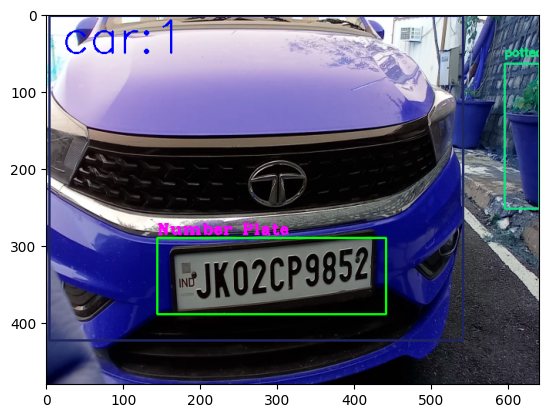

In [ ]:
if (counter>0):
  harcascade = '/content/drive/MyDrive/Classes/cardetection/haarcascade_russian_plate_number.xml'
  img=cv2.resize(c, (640, 480))
  min_area = 500
  plate_cascade = cv2.CascadeClassifier(harcascade)
  img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  plates = plate_cascade.detectMultiScale(img_gray, 1.1, 4)
  for (x,y,w,h) in plates:
    area = w * h

    if area > min_area:
      cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0), 2)
      cv2.putText(img, "Number Plate", (x,y-5), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255, 0, 255), 2)

      img_roi = img[y: y+h, x:x+w]
      plt.imshow(img_roi)
      k=img_roi
  plt.imshow(img)
  reader = easyocr.Reader(['en'])
  result = reader.readtext(k)
  

else:
  print("Number Plate Not Detected")  

In [ ]:
for i in result:
  k=i[1]
  h=k[0]+k[1]
  if(h.isupper() and len(k)>3):
    print("The Number Plate is :")
    print(k)

The Number Plate is :
JKO2CP9852


In [ ]:
%%javascript
window.open('http://192.168.137.140:5000/parking/api/logs/insert?plateNumber=JKO2CP9852', '_blank');

<IPython.core.display.Javascript object>